# **뉴스 요약 실습** 📰
---

### **프로젝트 진행 순서**
> 메일 등의 매체로 base64로 인코딩 되어있는 뉴스 기사를 받았다고 가정
> 1. 뉴스 기사, 이미지 (base64 파일) 디코딩
> 2. 문서 요약 / 키워드 추출
> 3. 요약 리포트 작성
> 4. html 파일로 Export

### **뉴스 기사 (base64 파일) 인코딩**
["AI로 5분만에 쇼핑몰 만든다"…NHN엔터프라이즈, '즉시' 출시](https://n.news.naver.com/mnews/article/215/0001147383) 원본 기사 확인

#### **뉴스 기사 인코딩 및 저장**
> - `문자열` -> `ASCII / Binary` -> `6bit 기준으로 cut` -> `base64 변환`

#### 문자열 인코딩

In [1]:
%config Completer.use_jedi = False

In [2]:
import base64

In [3]:
# 문자열
article = """
AI기술을 이용해 쇼핑몰을 빠르게 구축해주는 웹빌더 솔루션이 나왔다.

NHN클라우드의 자회사 NHN엔터프라이즈는 웹빌더 전문 기업 위븐과 이같은 내용의 신규 솔루션 '즉시'를 출시했다고 7일 밝혔다.

즉시에서 벤치마킹할 사이트 주소를 입력하면 AI기술이 사이트 구성 요소를 분석해 유사한 형태의 쇼핑몰을 구축해준다. 코딩 개발 없이 드래그 앤 드롭으로 간편하게 쇼핑몰 요소를 수정 및 편집할 수 있으며, 통상 쇼핑몰 개설 시 소요되는 1-2개월치의 작업량을 단 5분만에 소화할 수 있다.

이번 솔루션 개발에서 위븐은 ‘즉시’의 서비스 기획, 디자인, 개발 및 운영 등을 맡았다. NHN엔터프라이즈는 위븐의 기존 인프라를 NHN클라우드의 클라우드 시스템으로 이전 구축하고, ‘즉시’에 클라우드 인프라 구축을 위한 컨설팅 및 기술 지원을 제공했다.

NHN엔터프라이즈는 ‘즉시’가 제공하는 AI, 에디터, 콘텐츠 등 기능별로 서버를 구축해 관리할 수 있도록 지원하고 있다고 소개했다. 이를 통해 통합 서버 구축 시 발생할 수 있는 트래픽 이슈를 예방하고, 트래픽 급증 시 서버를 증설해 빠르게 대응할 수 있는 환경을 마련했다는 설명이다.

위븐 관계자는 “NHN엔터프라이즈와의 공동사업을 통해 현재 보유한 기술을 바탕으로 전문가부터 일반 사용자까지 쉽게 이용할 수 있도록 사용자 중심의 서비스를 지속 개발할 것"이라고 밝혔다.

NHN엔터프라이즈 측은 “다년간 NHN클라우드 서비스를 구축해온 경험과 노하우를 밑거름으로 위븐과 함께 출시한 신규 서비스 ‘즉시’의 쾌적하고 안정적인 서비스 운영에 기여해 나가겠다”며 “’즉시’를 통해 다수 기업이 클라우드 환경에서 쉽고 빠르게 쇼핑몰을 구축해 사업을 성공적으로 전개할 수 있도록 힘을 보태겠다”라고 밝혔다.
"""

In [4]:
# 내용을 bas64 인코딩
barticle = base64.b64encode(article.encode('utf-8'))
#print(barticle)

In [5]:
# 바이너리 기사 저장을 위해 wb를 사용하여 바이너리 기록
with open("base64_article", "wb") as f:
    data = barticle
    f.write(data)

#### 이미지 인코딩

In [6]:
path = "./img/nhn.png"
from PIL import Image

In [7]:
# 이미지를 바이너리 형태로 변환
with open(path, 'rb') as img:
    image = img.read()
    enc_img = base64.b64encode(image)

In [8]:
# 위에서 인코딩 된 이미지 파일(enc_img)을 enc_nhn.png로 저장
enc_img_path = "img/enc_nhn.png"
with open(enc_img_path, 'wb') as f:
    f.write(enc_img)

#### 인코딩 된 기사와 이미지 읽기

In [9]:
# base64_article 파일 바이너리 내용 확인을 위해 rb 사용
# 파일의 크기나 줄을 모르더라도 read()를 사용하면 읽는 것이 가능함
with open("base64_article", "rb") as f:
    lines = f.read()
    print(lines)

b'CkFJ6riw7Iig7J2EIOydtOyaqe2VtCDsh7ztlZHrqrDsnYQg67mg66W06rKMIOq1rOy2le2VtOyjvOuKlCDsm7nruYzrjZQg7IaU66Oo7IWY7J20IOuCmOyZlOuLpC4KCk5ITu2BtOudvOyasOuTnOydmCDsnpDtmozsgqwgTkhO7JeU7YSw7ZSE65287J207KaI64qUIOybueu5jOuNlCDsoITrrLgg6riw7JeFIOychOu4kOqzvCDsnbTqsJnsnYAg64K07Jqp7J2YIOyLoOq3nCDshpTro6jshZggJ+ymieyLnCfrpbwg7Lac7Iuc7ZaI64uk6rOgIDfsnbwg67Cd7ZiU64ukLgoK7KaJ7Iuc7JeQ7IScIOuypOy5mOuniO2Cue2VoCDsgqzsnbTtirgg7KO87IaM66W8IOyeheugpe2VmOuptCBBSeq4sOyIoOydtCDsgqzsnbTtirgg6rWs7ISxIOyalOyGjOulvCDrtoTshJ3tlbQg7Jyg7IKs7ZWcIO2Yle2DnOydmCDsh7ztlZHrqrDsnYQg6rWs7LaV7ZW07KSA64ukLiDsvZTrlKkg6rCc67CcIOyXhuydtCDrk5zrnpjqt7gg7JWkIOuTnOuhreycvOuhnCDqsITtjrjtlZjqsowg7Ie87ZWR66qwIOyalOyGjOulvCDsiJjsoJUg67CPIO2OuOynke2VoCDsiJgg7J6I7Jy866mwLCDthrXsg4Eg7Ie87ZWR66qwIOqwnOyEpCDsi5wg7IaM7JqU65CY64qUIDEtMuqwnOyblOy5mOydmCDsnpHsl4Xrn4nsnYQg64uoIDXrtoTrp4zsl5Ag7IaM7ZmU7ZWgIOyImCDsnojri6QuCgrsnbTrsogg7IaU66Oo7IWYIOqwnOuwnOyXkOyEnCDsnITruJDsnYAg4oCY7KaJ7Iuc4oCZ7J2YIOyEnOu5hOyKpCDquLDtmo0sIOuUlOyekOyduCwg6rCc67CcIOuwjy

In [10]:
# enc_nhn.png 파일 읽기
with open(enc_img_path, 'rb') as f:
    image = f.read()
    #print(image)

---

### **1. 뉴스 기사 (base64 파일) 디코딩**

In [11]:
# 인코딩 되어있는 이미지 디코딩
path = "news/dec_nhn.png"
with open(path, 'wb') as f:
    decode_data = base64.decodebytes(enc_img)
    f.write(decode_data)

In [12]:
source = Image.open("news/dec_nhn.png")
#source

In [13]:
# 인코딩 되어 있는 기사 디코딩
dec_article = base64.b64decode(barticle).decode('utf-8')
#print(dec_article)

### **2. 문서 요약 / 키워드 추출**

In [14]:
# split_sentences 함수로 문장 단위로 구분
from gensim.summarization.summarizer import summarize
from gensim.summarization.textcleaner import split_sentences

#### summarize 함수

In [15]:
# 단어수 기반 요약(word_count=50, 50자 정도로 요약)
print(summarize(dec_article, word_count=50))

NHN클라우드의 자회사 NHN엔터프라이즈는 웹빌더 전문 기업 위븐과 이같은 내용의 신규 솔루션 '즉시'를 출시했다고 7일 밝혔다.
NHN엔터프라이즈 측은 “다년간 NHN클라우드 서비스를 구축해온 경험과 노하우를 밑거름으로 위븐과 함께 출시한 신규 서비스 ‘즉시’의 쾌적하고 안정적인 서비스 운영에 기여해 나가겠다”며 “’즉시’를 통해 다수 기업이 클라우드 환경에서 쉽고 빠르게 쇼핑몰을 구축해 사업을 성공적으로 전개할 수 있도록 힘을 보태겠다”라고 밝혔다.


In [16]:
# 비율 기반 요약(ratio=0.2, 전체 기사 내용을 20%정도로 요약)
print(summarize(dec_article, ratio=0.2))

NHN클라우드의 자회사 NHN엔터프라이즈는 웹빌더 전문 기업 위븐과 이같은 내용의 신규 솔루션 '즉시'를 출시했다고 7일 밝혔다.
NHN엔터프라이즈 측은 “다년간 NHN클라우드 서비스를 구축해온 경험과 노하우를 밑거름으로 위븐과 함께 출시한 신규 서비스 ‘즉시’의 쾌적하고 안정적인 서비스 운영에 기여해 나가겠다”며 “’즉시’를 통해 다수 기업이 클라우드 환경에서 쉽고 빠르게 쇼핑몰을 구축해 사업을 성공적으로 전개할 수 있도록 힘을 보태겠다”라고 밝혔다.


In [17]:
# 요약 텍스트 저장
dec_article_summarized = summarize(dec_article, ratio=0.1)

#### 키워드 추출

In [18]:
import collections
import textwrap
import re

In [19]:
# 줄바꿈 정렬
dec_article_align = textwrap.fill(dec_article, width=50)
print(dec_article_align)

 AI기술을 이용해 쇼핑몰을 빠르게 구축해주는 웹빌더 솔루션이 나왔다.  NHN클라우드의
자회사 NHN엔터프라이즈는 웹빌더 전문 기업 위븐과 이같은 내용의 신규 솔루션 '즉시'를
출시했다고 7일 밝혔다.  즉시에서 벤치마킹할 사이트 주소를 입력하면 AI기술이 사이트
구성 요소를 분석해 유사한 형태의 쇼핑몰을 구축해준다. 코딩 개발 없이 드래그 앤 드롭으로
간편하게 쇼핑몰 요소를 수정 및 편집할 수 있으며, 통상 쇼핑몰 개설 시 소요되는
1-2개월치의 작업량을 단 5분만에 소화할 수 있다.  이번 솔루션 개발에서 위븐은
‘즉시’의 서비스 기획, 디자인, 개발 및 운영 등을 맡았다. NHN엔터프라이즈는 위븐의
기존 인프라를 NHN클라우드의 클라우드 시스템으로 이전 구축하고, ‘즉시’에 클라우드
인프라 구축을 위한 컨설팅 및 기술 지원을 제공했다.  NHN엔터프라이즈는 ‘즉시’가
제공하는 AI, 에디터, 콘텐츠 등 기능별로 서버를 구축해 관리할 수 있도록 지원하고
있다고 소개했다. 이를 통해 통합 서버 구축 시 발생할 수 있는 트래픽 이슈를 예방하고,
트래픽 급증 시 서버를 증설해 빠르게 대응할 수 있는 환경을 마련했다는 설명이다.  위븐
관계자는 “NHN엔터프라이즈와의 공동사업을 통해 현재 보유한 기술을 바탕으로 전문가부터
일반 사용자까지 쉽게 이용할 수 있도록 사용자 중심의 서비스를 지속 개발할 것"이라고
밝혔다.  NHN엔터프라이즈 측은 “다년간 NHN클라우드 서비스를 구축해온 경험과 노하우를
밑거름으로 위븐과 함께 출시한 신규 서비스 ‘즉시’의 쾌적하고 안정적인 서비스 운영에
기여해 나가겠다”며 “’즉시’를 통해 다수 기업이 클라우드 환경에서 쉽고 빠르게 쇼핑몰을
구축해 사업을 성공적으로 전개할 수 있도록 힘을 보태겠다”라고 밝혔다.


In [20]:
# re 정규표현식을 사용해서 단어 추출
words = re.findall(r'\w+', dec_article_align)
print(words)

['AI기술을', '이용해', '쇼핑몰을', '빠르게', '구축해주는', '웹빌더', '솔루션이', '나왔다', 'NHN클라우드의', '자회사', 'NHN엔터프라이즈는', '웹빌더', '전문', '기업', '위븐과', '이같은', '내용의', '신규', '솔루션', '즉시', '를', '출시했다고', '7일', '밝혔다', '즉시에서', '벤치마킹할', '사이트', '주소를', '입력하면', 'AI기술이', '사이트', '구성', '요소를', '분석해', '유사한', '형태의', '쇼핑몰을', '구축해준다', '코딩', '개발', '없이', '드래그', '앤', '드롭으로', '간편하게', '쇼핑몰', '요소를', '수정', '및', '편집할', '수', '있으며', '통상', '쇼핑몰', '개설', '시', '소요되는', '1', '2개월치의', '작업량을', '단', '5분만에', '소화할', '수', '있다', '이번', '솔루션', '개발에서', '위븐은', '즉시', '의', '서비스', '기획', '디자인', '개발', '및', '운영', '등을', '맡았다', 'NHN엔터프라이즈는', '위븐의', '기존', '인프라를', 'NHN클라우드의', '클라우드', '시스템으로', '이전', '구축하고', '즉시', '에', '클라우드', '인프라', '구축을', '위한', '컨설팅', '및', '기술', '지원을', '제공했다', 'NHN엔터프라이즈는', '즉시', '가', '제공하는', 'AI', '에디터', '콘텐츠', '등', '기능별로', '서버를', '구축해', '관리할', '수', '있도록', '지원하고', '있다고', '소개했다', '이를', '통해', '통합', '서버', '구축', '시', '발생할', '수', '있는', '트래픽', '이슈를', '예방하고', '트래픽', '급증', '시', '서버를', '증설해', '빠르게', '대응할', '수', '있는', '환경을', '마련했다는', '설명이다', '위븐', '관계자는', 'NHN엔터

In [21]:
# 빈도수 산출
counter = collections.Counter(words)
print(counter)

Counter({'수': 7, '즉시': 6, '쇼핑몰을': 3, '빠르게': 3, 'NHN엔터프라이즈는': 3, '밝혔다': 3, '및': 3, '시': 3, '서비스': 3, '클라우드': 3, '있도록': 3, '통해': 3, '웹빌더': 2, 'NHN클라우드의': 2, '위븐과': 2, '신규': 2, '솔루션': 2, '를': 2, '사이트': 2, '요소를': 2, '개발': 2, '쇼핑몰': 2, '의': 2, '서버를': 2, '구축해': 2, '있는': 2, '트래픽': 2, '서비스를': 2, 'AI기술을': 1, '이용해': 1, '구축해주는': 1, '솔루션이': 1, '나왔다': 1, '자회사': 1, '전문': 1, '기업': 1, '이같은': 1, '내용의': 1, '출시했다고': 1, '7일': 1, '즉시에서': 1, '벤치마킹할': 1, '주소를': 1, '입력하면': 1, 'AI기술이': 1, '구성': 1, '분석해': 1, '유사한': 1, '형태의': 1, '구축해준다': 1, '코딩': 1, '없이': 1, '드래그': 1, '앤': 1, '드롭으로': 1, '간편하게': 1, '수정': 1, '편집할': 1, '있으며': 1, '통상': 1, '개설': 1, '소요되는': 1, '1': 1, '2개월치의': 1, '작업량을': 1, '단': 1, '5분만에': 1, '소화할': 1, '있다': 1, '이번': 1, '개발에서': 1, '위븐은': 1, '기획': 1, '디자인': 1, '운영': 1, '등을': 1, '맡았다': 1, '위븐의': 1, '기존': 1, '인프라를': 1, '시스템으로': 1, '이전': 1, '구축하고': 1, '에': 1, '인프라': 1, '구축을': 1, '위한': 1, '컨설팅': 1, '기술': 1, '지원을': 1, '제공했다': 1, '가': 1, '제공하는': 1, 'AI': 1, '에디터': 1, '콘텐츠': 1, '등': 1, '기능별로': 1, '관리할': 1, '지

In [22]:
# 자주 사용된 단어 추출(가장 빈도수가 높은 5개 중에 "수:7"을 제외하고 상위 4개 추출)
keywords = counter.most_common(5)[1:]
print(keywords)

[('즉시', 6), ('쇼핑몰을', 3), ('빠르게', 3), ('NHN엔터프라이즈는', 3)]


### **3. 요약 리포트 작성**

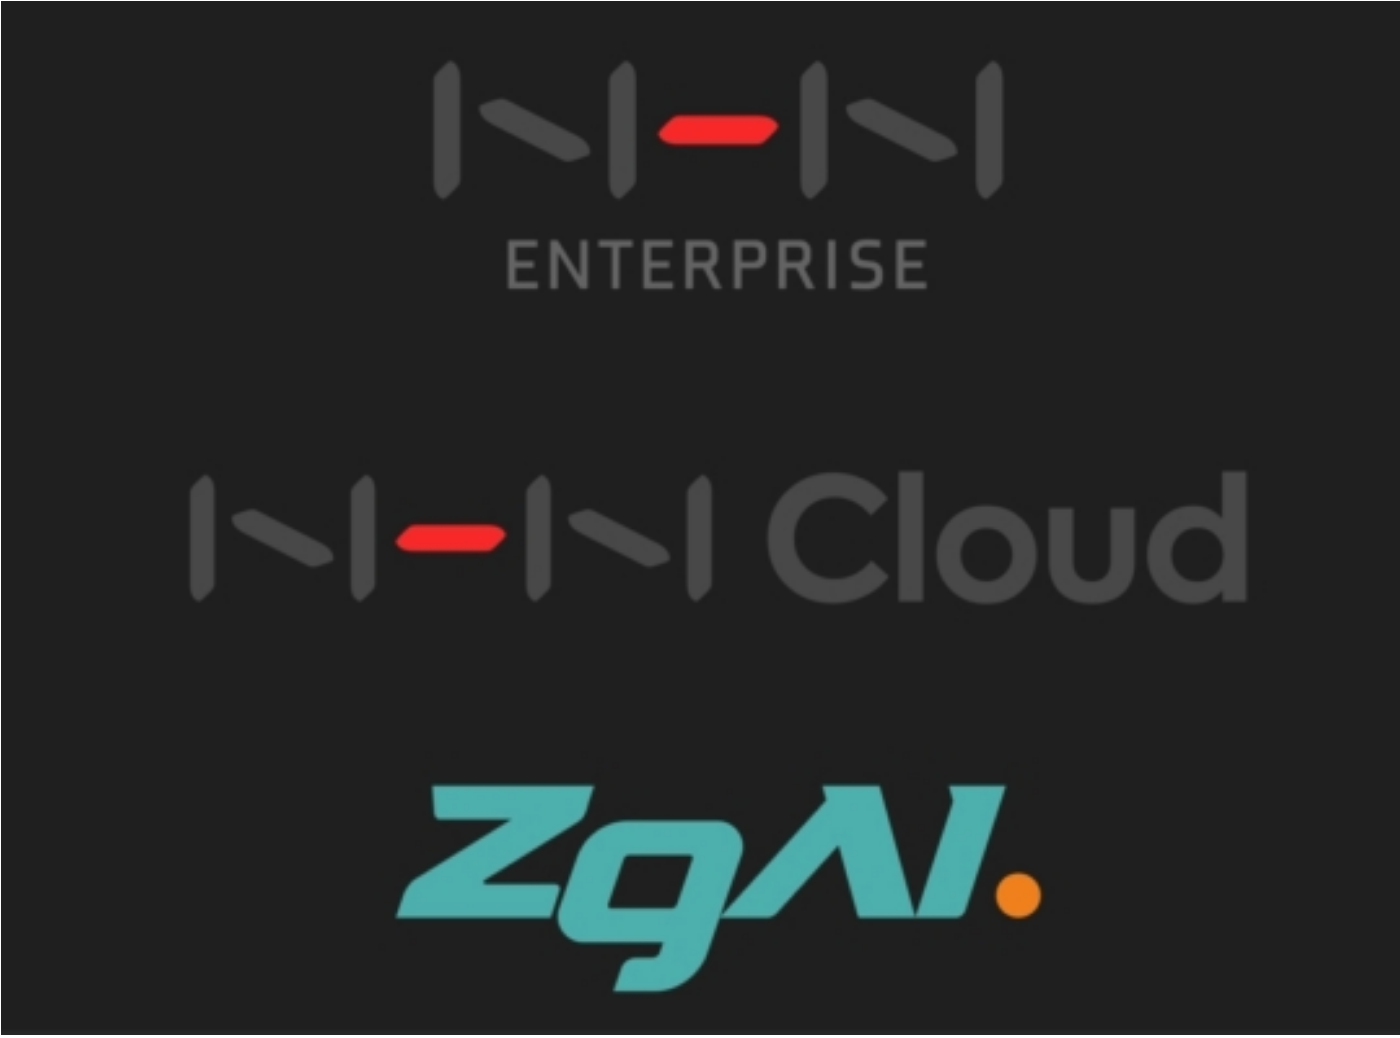

In [23]:
from IPython.display import Image
Image(filename=path, width=300)

In [24]:
print(dec_article_summarized)

NHN클라우드의 자회사 NHN엔터프라이즈는 웹빌더 전문 기업 위븐과 이같은 내용의 신규 솔루션 '즉시'를 출시했다고 7일 밝혔다.


In [25]:
# 태그 달기
keys = ['#' + elem[0] for elem in keywords]
keys = ' '.join(keys)
print(keys)

#즉시 #쇼핑몰을 #빠르게 #NHN엔터프라이즈는


### **4. html 파일로 Export**

In [26]:
htmlfile = open('news/summary.html', 'w', encoding='utf-8')
htmlfile.write("<html>\n")
htmlfile.write ("<h1>"+ '"AI로 5분만에 쇼핑몰 만든다"…NHN엔터프라이즈, "즉시" 출시' + "</h1>\n") 
htmlfile.write ("<img src='dec_nhn.png' style='width: 300px;' />\n")
htmlfile.write ("<p>"+ dec_article_summarized + "</p>\n") 
htmlfile.write ("<p style='background-color:powderblue;''>"+ keys + "</p>\n") 
htmlfile.write("</html>\n")
htmlfile.close()